# Import Libraries

In [1]:
import mysql.connector
import pandas as pd

# Data Collection

In [2]:
df = pd.read_csv("online_retail.csv") #load Dataset

In [3]:
df.head(10) # Display first 10 rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,01/12/2009 07:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,01/12/2009 07:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,01/12/2009 07:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,01/12/2009 07:46,3.75,13085.0,United Kingdom


In [4]:
df.tail(10)#display last 10 rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1048565,580501,23301,GARDENERS KNEELING PAD KEEP CALM,4,04/12/2011 13:00,1.65,14546.0,United Kingdom
1048566,580501,23118,PARISIENNE JEWELLERY DRAWER,2,04/12/2011 13:00,7.50,14546.0,United Kingdom
1048567,580501,84978,HANGING HEART JAR T-LIGHT HOLDER,4,04/12/2011 13:00,1.25,14546.0,United Kingdom
1048568,580501,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,2,04/12/2011 13:00,6.75,14546.0,United Kingdom
1048569,580501,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,04/12/2011 13:00,8.50,14546.0,United Kingdom
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04/12/2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04/12/2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04/12/2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04/12/2011 13:15,2.89,16931.0,United Kingdom
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,04/12/2011 13:15,6.65,16931.0,United Kingdom


**Check Data structure**

Check column names, data types and missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [6]:
df.isna().sum()# checking for null values

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [7]:
df.duplicated().sum() # Checking for duplicates

34150

In [8]:
sum(df['Quantity']<0) # checking for negative value in quantity column 

22697

In [9]:
sum(df['Price']<0)# checking for negative value in price column

5

Key questions that need to be addressed before proceeding with data preprocessing.

1. Are there missing values in key columns? Yes ,there are missing values in CustomerID and Description columns

2. Is invoiceDate in datetime format or do we need to convert it? No, InvoiceDate isn't in Datetime format.

3. we need to convert Are there negative or zero values in Quantity or unit price? Yes

In [10]:
df1 = df.copy()

In [11]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04/12/2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04/12/2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04/12/2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04/12/2011 13:15,2.89,16931.0,United Kingdom


**Data Cleaning**

Missing Values:

1.Customer ID has 236,682 missing values - These might be anonymous transactions. so needs to be removed

2.Description has 4,372 missing values - This can be ignored since we are not using product descriptions for clustering.

Duplicate values

34,150 duplicate rows - We should drop these to avoid data bias.

Negative values:

1.Negative Price: Likely errors; should be removed

2.Negative quantity: Might represent returns and returns affect customer behaviour so quantity column is important aspect when comes to checking loyality of the buyer therefore rather than

In [12]:
df1 = df1.dropna(subset = ["Customer ID"]) # dropping missing values in the customer ID 

In [13]:
df1["Customer ID"].isna().sum() # checking whether the missing value is dropped or not

0

In [14]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"]) # Convert InvoiceDate to datetime

C:\Users\VENKAT\AppData\Local\Temp\ipykernel_15792\618938433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"]) # Convert InvoiceDate to datetime


In [15]:
df1["InvoiceDate"].dtypes # checking the conversion

dtype('<M8[ns]')

In [16]:
df1 = df1.drop_duplicates() # removing the duplicate values

In [17]:
df1.duplicated().sum() # checking whether duplicate values are removed or not  

0

In [18]:
df1 = df1[(df1['Price']>0)] # remove rows where price is negative

In [19]:
sum(df1['Price']<0)# checking for negative value in price column

0

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785529 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      785529 non-null  object        
 1   StockCode    785529 non-null  object        
 2   Description  785529 non-null  object        
 3   Quantity     785529 non-null  int64         
 4   InvoiceDate  785529 non-null  datetime64[ns]
 5   Price        785529 non-null  float64       
 6   Customer ID  785529 non-null  float64       
 7   Country      785529 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.9+ MB


In [21]:
df1.describe()

,Quantity,Price,Customer ID
count,785529.000000,785529.000000,785529.000000
mean,12.593755,3.716693,15313.174812
std,142.780222,71.916124,1695.963261
min,-74215.000000,0.001000,12346.000000
25%,2.000000,1.250000,13963.000000
50%,5.000000,1.950000,15237.000000
75%,12.000000,3.750000,16788.000000
max,74215.000000,38970.000000,18287.000000


In [22]:
df1['TotalPrice'] = df1['Quantity'] * df1['Price']

In [23]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-04-12 13:00:00,8.25,14546.0,United Kingdom,16.50
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-04-12 13:00:00,4.95,14546.0,United Kingdom,14.85
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-04-12 13:15:00,1.65,16931.0,United Kingdom,4.95
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-04-12 13:15:00,2.89,16931.0,United Kingdom,5.78


In [ ]:
# Create a connection to MYSQL

con = mysql.connector.connect(
   host = 'localhost',
   user = 'root',
   password = 'venkat',
   database = 'retail_segmentation_project'

)

cursor = con.cursor()

In [ ]:
# Insert data into Customers table
customers = df1[['Customer ID', 'Country']].drop_duplicates()
for i, row in customers.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO customers (CustomerID, Country)
        VALUES (%s, %s)
    """, (int(row['Customer ID']), row['Country']))

In [ ]:
customers

In [ ]:
# Insert data into Products table
products = df1[['StockCode', 'Description', 'Price']].drop_duplicates()
for i, row in products.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO products (StockCode, Description, Price)
        VALUES (%s, %s, %s)
    """, (row['StockCode'], row['Description'], row['Price']))

In [ ]:
products

In [ ]:
transactions = df1[['Invoice', 'InvoiceDate', 'Customer ID', 'StockCode', 'Quantity', 'TotalPrice']]
transactions = transactions.rename(columns={'Customer ID': 'CustomerID'})

for i, row in transactions.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO Transactions (Invoice, InvoiceDate, CustomerID, StockCode, Quantity, TotalPrice)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, (row['Invoice'], row['InvoiceDate'], int(row['CustomerID']), row['StockCode'], row['Quantity'], row['TotalPrice']))

In [ ]:
transactions

In [ ]:
# Commit changes and close connection
con.commit()
con.close()

**Understanding the Row Discrepancy Between Jupyter and MySQL**

1.Duplicate Data Handling (INSERT IGNORE)

In [ ]:
# Check duplicates in Customers
print(customers.duplicated(subset=['Customer ID']).sum())

# Check duplicates in Products
print(products.duplicated(subset=['StockCode']).sum())

# Check duplicates in Transactions
print(transactions.duplicated(subset=['Invoice']).sum())

2. Foreign Key Constraints in MySQL

In [ ]:
# Transactions with missing CustomerIDs
orphan_customers = transactions[~transactions['CustomerID'].isin(customers['Customer ID'])]
print(f"Orphan Transactions (missing CustomerID): {len(orphan_customers)}")

# Transactions with missing Product StockCodes
orphan_products = transactions[~transactions['StockCode'].isin(products['StockCode'])]
print(f"Orphan Transactions (missing StockCode): {len(orphan_products)}")

3. Data Type Conversion Errors

In [ ]:
print(transactions.isnull().sum())

4. MySQL Constraints (Primary Key Conflicts)

In [ ]:
print(transactions.duplicated(subset=['Invoice']).sum())

**Analysis of the Results**
1. Duplicate Records Identified

Customers: 13 duplicate Customer IDs

Products: 8,507 duplicate StockCodes

Transactions: 741,257 duplicate Invoices

This explains a major part of the discrepancy. Since using INSERT IGNORE, these duplicates were ignored during insertion into MySQL.

2. No Orphan Transactions

Orphan Transactions with Missing Customer IDs: 0

Orphan Transactions with Missing Stock Codes: 0

This means foreign key constraints didn’t cause any data loss, which is good.

3. No Null Values

There are no missing (NULL) values in any of the transaction columns, so this isn't the issue.


**Root Cause of the Discrepancy:**

Primary Key Constraints in MySQL:
The Transactions table uses Invoice as the primary key, but in reality, one invoice can have multiple products (hence multiple rows with the same Invoice number).

**Impact**: MySQL rejects all duplicate invoices because the Invoice column must be unique.

**How to Fix This:**

Option 1: Add a New Primary Key (TransactionID)

Instead of using Invoice as the primary key, we create an auto-incrementing TransactionID to uniquely identify each transaction.
This ensures that even if an invoice contains multiple products, each transaction has a distinct ID.

Option 2: Add a Composite Key (Invoice + StockCode)

This approach uses a combination of Invoice and StockCode as the primary key to ensure uniqueness.
While it solves the immediate problem, it introduces complexity in querying and maintaining the database.

**Why I Recommend Option 1:**

Uniqueness:

Each transaction is uniquely identified by TransactionID, even if multiple products exist under the same invoice.
This eliminates conflicts caused by duplicate invoice numbers.

Flexibility:

Adding new features (like returns, discounts, or multiple payment methods) becomes easier since each row has a unique identifier.We can reference transactions directly without worrying about composite key dependencies.

Scalability:

As the dataset grows, indexing on a single column (TransactionID) is faster and more efficient than a composite key.
The database remains optimized for performance even with millions of transactions.

Simpler Queries:

Queries are straightforward because we reference just one column instead of multiple columns in joins and filters.

**Choosing Option 1 ensures better data integrity, reduces query complexity, and makes the database more adaptable to future changes.**



# RFM Model Analysis 


Recency (R): How recently a customer made a purchase.

Frequency (F): How often a customer makes purchases.

Monetary (M): How much money a customer spends.

**Export RFM Data to Python**

After calculating RFM metrics using SQL ,Now we have the RFM data in SQL, we'll load it into Python for further processing and clustering.

In [24]:
# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='venkat',
    database='retail_segmentation_project'
)

# Query RFM data
query = """
    SELECT 
        r.customerID,
        r.Recency,
        f.Frequency,
        m.Monetary
    FROM 
        (SELECT customerID, DATEDIFF('2011-12-10', MAX(InvoiceDate)) AS Recency
         FROM transactions
         GROUP BY customerID) AS r 
    JOIN 
        (SELECT customerID, COUNT(DISTINCT Invoice) AS Frequency
         FROM Transactions
         GROUP BY customerID) AS f ON r.customerID = f.customerID
    JOIN 
        (SELECT customerID, SUM(TotalPrice) AS Monetary
         FROM Transactions
         GROUP BY customerID) AS m ON r.customerID = m.customerID;
"""

# Load data into DataFrame
rfm_df = pd.read_sql(query, conn)
conn.close()

D:\anaconda\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [25]:
rfm_df

,customerID,Recency,Frequency,Monetary
0,12346,326,17,-51.74
1,12347,40,7,4696.71
2,12348,76,5,2019.40
3,12349,19,5,4404.54
4,12350,311,1,334.40
...,...,...,...,...
5916,18283,10,21,2456.90
5917,18284,548,2,436.68
5918,18285,661,1,427.00
5919,18286,477,3,1188.43


# Verifying RFM Data

Verifying RFM (Recency, Frequency, Monetary) data involves a series of checks to ensure that the data is accurate, consistent, and logically makes sense based on customer behaviors and transaction histories.

**Statistical Overview**

Key Points to Check:

1. Recency: Look for negative values (which shouldn't exist) and overly large values that may indicate data errors or outliers.

2. Frequency: Ensure frequencies make sense relative to the time span of your dataset. Very high values might indicate duplicate records.

3. Monetary: Check for negative values, which could indicate returns or data entry errors, unless you have processed returns as part of your transactions.

In [26]:
print(rfm_df.describe())

         customerID      Recency    Frequency       Monetary
count   5921.000000  5921.000000  5921.000000    5921.000000
mean   15318.642459   210.148455     7.477115    2710.075080
std     1714.560495   216.408616    15.804866   13453.471719
min    12346.000000     0.000000     1.000000  -25111.090000
25%    13835.000000    29.000000     2.000000     318.150000
50%    15320.000000   114.000000     3.000000     814.070000
75%    16804.000000   381.000000     8.000000    2129.780000
max    18287.000000  1062.000000   503.000000  558895.070000


Count: All metrics have the same count (5921), which is good as it indicates no missing values across RFM metrics.
    
**Recency:**

Mean: 210 days

Min: 0 days (recent purchase)

Max: 1062 days (no purchase in almost three years)
    
**Frequency:**

Mean: 7.47 (average number of transactions per customer)

Min: 1 (at least one purchase)

Max: 503 (very frequent customer)
    
**Monetary:**

Mean: 2710.08

Min: -2511.69 (this could indicate returns or refunds)

Max: 558895.07 (very high spender)

In [27]:
print(rfm_df.isnull().sum())

customerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64


**Key Points and Potential Issues:**
1. Negative Monetary Values:

The minimum value in the Monetary column is negative (-2511.69). This suggests that there are refunds or errors in the dataset. You may need to decide whether to keep these records depending on how you want to handle returns in your analysis.

2. Wide Range in Frequency and Monetary:

The wide range in the Frequency and Monetary values, especially the high maximums, may suggest the presence of outliers. These outliers could significantly impact mean values and any clustering algorithm.

3. High Recency Values:

Some customers have not purchased in a long time (over three years), which might classify them as churned or inactive.

**Recommendations for Further Analysis:**
    
1. Visual Inspection:

Plot histograms or boxplots for each RFM metric to visually inspect the distribution and identify outliers.

2. Handling Negative Monetary Values:

Investigate the negative monetary values to confirm if they are returns or errors. Adjust the dataset accordingly by possibly removing these records or considering them separately in your analysis.

3. Outlier Treatment:
    
Consider applying logarithmic transformation or winsorizing the data to reduce the impact of outliers, especially in the Frequency and Monetary fields.

4. Segmentation Preparation:

Based on the distribution of these metrics, segmenting the customers into groups (e.g., high value vs. low value, recent vs. inactive) could be skewed by outliers. we may need to standardize or normalize the data.

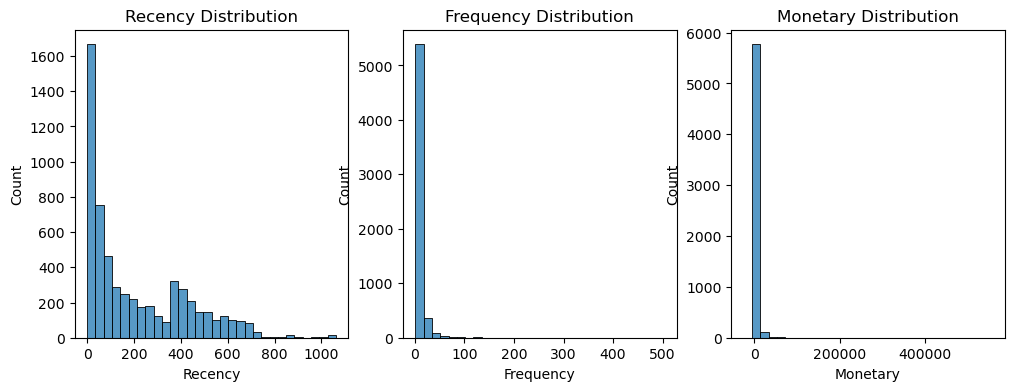

In [28]:
# Visual Inspection
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for RFM metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=rfm_df, x='Recency', bins=30)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=rfm_df, x='Frequency', bins=30)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=rfm_df, x='Monetary', bins=30)
plt.title('Monetary Distribution')
plt.show()

**Analysis on RFM Distribution plot:**
    
    
1. *Recency Distribution*:

Observation: Most customers have made recent purchases (majority have recency between 0 and 200 days), indicating a large portion of active customers.

Implication: The skew towards lower recency values is typical and desirable, showing many recent interactions.

2. *Frequency Distribution*:

Observation: Highly skewed distribution with a majority of customers having a very low frequency (most between 1 and 50).

Implication: This indicates that a large number of customers purchase infrequently. High frequency values (outliers) may represent very loyal customers.

3. *Monetary Distribution*:

Observation: Extremely skewed to the right, with the vast majority of customers having a low monetary value and very few high 
spenders.

Implication: This is common in retail datasets, where many customers spend small amounts while a few high spenders contribute significantly to overall revenue. 


**Outliers are evident and might need further analysis or handling**

# Data Handling

In [29]:
# Detecting outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for Recency, Frequency, and Monetary
outliers_recency = detect_outliers(rfm_df, 'Recency')
outliers_frequency = detect_outliers(rfm_df, 'Frequency')
outliers_monetary = detect_outliers(rfm_df, 'Monetary')

# Display number of outliers detected
print(f"Outliers in Recency: {len(outliers_recency)}")
print(f"Outliers in Frequency: {len(outliers_frequency)}")
print(f"Outliers in Monetary: {len(outliers_monetary)}")

Outliers in Recency: 33
Outliers in Frequency: 535
Outliers in Monetary: 638


In [30]:
# Removing outliers from the RFM dataset
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
rfm_clean = remove_outliers(rfm_df, 'Recency')
rfm_clean = remove_outliers(rfm_clean, 'Frequency')
rfm_clean = remove_outliers(rfm_clean, 'Monetary')

# Check the new dataset shape
print(f"Original dataset shape: {rfm_df.shape}")
print(f"Cleaned dataset shape: {rfm_clean.shape}")

Original dataset shape: (5921, 4)
Cleaned dataset shape: (4919, 4)


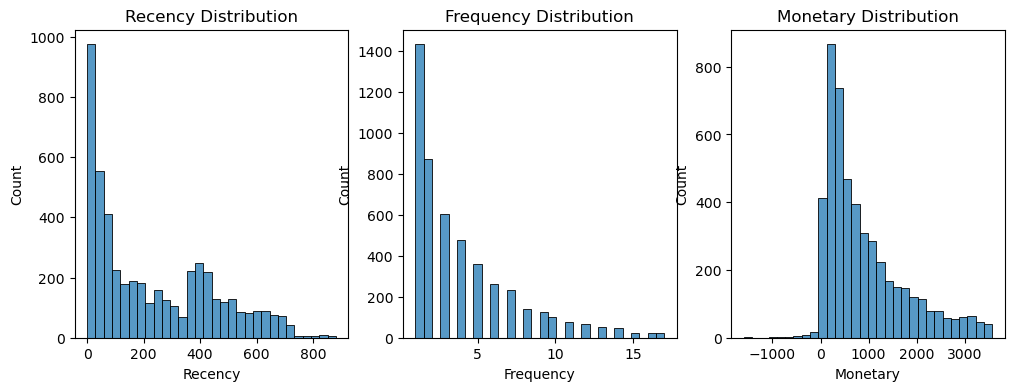

In [31]:
# Visual Inspection after outlier removal with cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for RFM metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=rfm_clean, x='Recency', bins=30)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=rfm_clean, x='Frequency', bins=30)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=rfm_clean, x='Monetary', bins=30)
plt.title('Monetary Distribution')
plt.show()

**Re-scale the Data for Clustering**

In [32]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting RFM features after outlier removal
rfm_features = rfm_clean[['Recency', 'Frequency', 'Monetary']]

# Apply log transformation to handle skewness
rfm_features['Monetary'] = np.log1p(rfm_features['Monetary'].clip(lower=0))

# Standardizing the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

C:\Users\VENKAT\AppData\Local\Temp\ipykernel_15792\4088834326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features['Monetary'] = np.log1p(rfm_features['Monetary'].clip(lower=0))


In [33]:
rfm_scaled

array([[ 0.4330862 ,  3.87219662, -4.74071009],
       [-0.74282225,  0.32322416,  1.01875633],
       [ 0.36253169, -0.85976666, -0.34011373],
       ...,
       [ 1.4772929 , -0.56401895, -0.13870083],
       [ 2.00880352, -0.85976666, -0.15562486],
       [ 1.1433349 , -0.26827125,  0.61782771]])

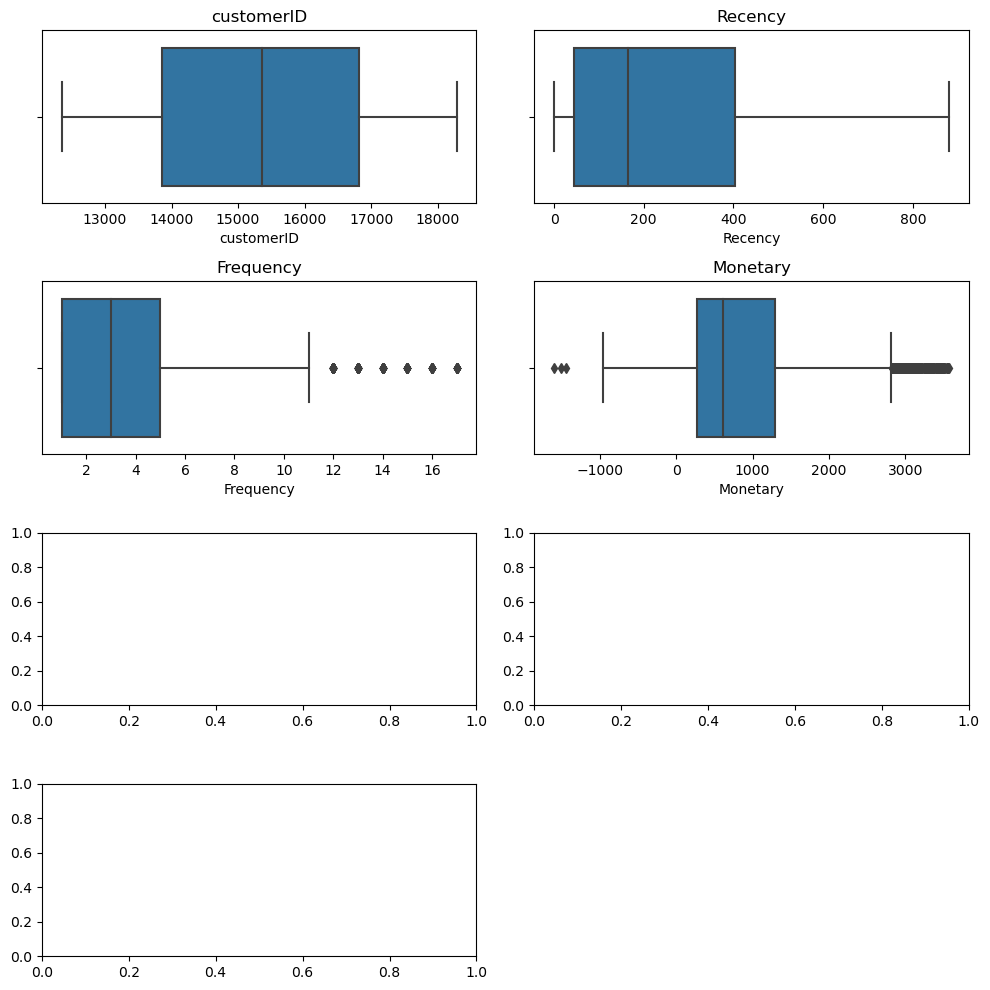

In [34]:
def find_box_out(df):
    columns = df.select_dtypes(include=np.number).columns
    fig, ax = plt.subplots(4, 2, figsize=(10, 10))
    
    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)  # Determine row and column index for the subplot
        sns.boxplot(x=df[col], ax=ax[row, col_num])  # Plot boxplot
        ax[row, col_num].set_title(col)  # Set title

    # Remove the empty subplot in the last row and last column
    fig.delaxes(ax[3, 1])
    fig.tight_layout()
    plt.show()

find_box_out(rfm_clean)

**Boxplot Analysis of Transformed Data**

1. *Recency (Log-Transformed)*:

The log transformation has reduced skewness, making the data more symmetric. A few minor outliers still exist but are not extreme, which is acceptable for clustering.

2. *Frequency (Log-Transformed)*:

The transformation has improved the distribution, but there are still some outliers (customers with unusually high purchase frequencies).
These could represent loyal or highly engaged customers, which might be meaningful for segmentation.

3. *Monetary (Log-Transformed)*:

The transformation has reduced the extreme skewness significantly.
However, outliers remain, representing high-spending customers, which can be valuable insights for marketing strategies.

**Should We Remove the Outliers?**

Outliers in RFM data are not always "bad."

Important Insight: Some outliers represent high-value customers (e.g., frequent buyers, big spenders), and removing them might lead to a loss of valuable business insights.

In [35]:
# Function to remove extreme outliers using IQR
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # More conservative threshold
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to log-transformed features if needed
rfm_clean = remove_extreme_outliers(rfm_clean, 'Recency')
rfm_clean = remove_extreme_outliers(rfm_clean, 'Frequency')
rfm_clean = remove_extreme_outliers(rfm_clean, 'Monetary')


# Clustering

**What is K-mean Clustering?**

K-Means Clustering is an unsupervised machine learning algorithm used to group data points into clusters based on their similarity. It's commonly used for customer segmentation, as in this project.


**How does K-Means work?**

1. Choose the Number of Clusters (k):

You decide how many groups you want to form (that’s why we used the Elbow Method to find the optimal k).

2. Randomly Initialize Centroids:

The algorithm randomly places k centroids (points representing the center of each cluster) in the data space.

3. Assign Data Points to Nearest Centroid:

Each data point is assigned to the closest centroid, forming a cluster.

4. Recalculate Centroids:

The centroids are moved to the center of the data points assigned to their cluster.

5. Repeat Steps 3-4:

This process continues until the centroids no longer move significantly. This is when the algorithm has converged.

**Determine the optimal number of clusters using the Elbow Method**

**What is Elbow method?**

The Elbow Method helps determine the optimal number of clusters (k).

We calculate the Sum of Squared Errors (SSE) for different values of k:

SSE measures how far the data points are from their cluster's centroid. Lower SSE means data points are closer to the centroid (better fit).

We plot k vs. SSE to form an "elbow-shaped" curve.

The point where the SSE starts to decrease more slowly (forming an "elbow") is considered the optimal number of clusters.

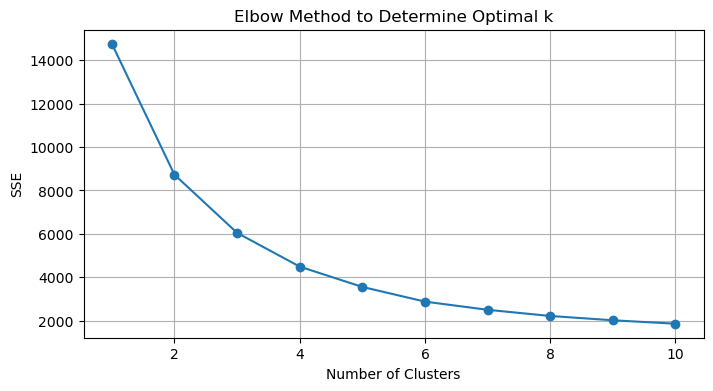

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

**Interpreting the Elbow Plot You Provided**

X-axis: Number of Clusters (k)
    
Y-axis: Sum of Squared Errors (SSE)
    
The plot shows a steep drop from k = 1 to k = 3, then the decrease becomes more gradual after k = 4.

**Where is the "Elbow"?**

The "elbow point" appears to be around k = 4.

This suggests that 4 clusters would provide the best balance between cluster compactness and simplicity.

**Apply K-Means with 4 Clusters**

In [37]:
optimal_k = 4 # Update this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
rfm_clean['Cluster'] = kmeans.fit_predict(rfm_scaled)

**Analyze Cluster Characteristics**

In [38]:
cluster_summary = rfm_clean.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print(cluster_summary)

   Cluster     Recency  Frequency     Monetary
0        0   96.024297   2.914245   754.367866
1        1  504.247423   1.958763  -173.617216
2        2  472.359577   1.963572   464.756351
3        3   94.275220   9.373164  2034.317884




Cluster 0 - Potential Loyalists

Cluster 1 - Churned / Problematic Customers/Inactive 

Cluster 2 - Lost / At-Risk Customers

Cluster 3 - Best / Loyal Customers


Recency (R): How recently a customer purchased (lower = better).

Frequency (F): How often a customer purchases (higher = better).

Monetary (M): How much money the customer spends (higher = better).



**Cluster summary interpretation**

**Cluster 0 — Moderately Active Customers / Potential Loyalists**

Recency (96): They made a purchase relatively recently.

Frequency (2.91): Low to moderate purchase frequency.

Monetary (754.37): Moderate spending.

*Insights:*

These customers are somewhat engaged.

Potential to upsell or turn them into loyal customers with targeted promotions.


**Cluster 1 — Churned / Problematic Customers / Inactive**

Recency (504): Haven’t purchased in a long time.

Frequency (1.96): Very infrequent purchases.

Monetary (-173.61): Negative spending, possibly due to returns or refunds.

*Insights:*

These customers are likely churned or may have had negative experiences leading to returns.

Action: Investigate return reasons, offer win-back campaigns or customer satisfaction surveys.


**Cluster 2 — At-Risk / Lost Customers**

Recency (472): Haven’t purchased in a long time (but not as extreme as Cluster 1).

Frequency (1.96): Rare purchases.

Monetary (464.76): Moderate spending in the past.

*Insights:*

These are at-risk customers who might churn soon.

Action: Send personalized re-engagement campaigns with discounts or reminders.

**Cluster 3 — Best / Loyal Customers**

Recency (94): Recent purchasers.

Frequency (9.37): High purchase frequency.

Monetary (2034.32): Highest spenders.

*Insights:*

These are your most valuable, loyal customers.

Action: Focus on retention strategies like exclusive offers, loyalty programs, and VIP rewards.

**Visualize the Clusters**

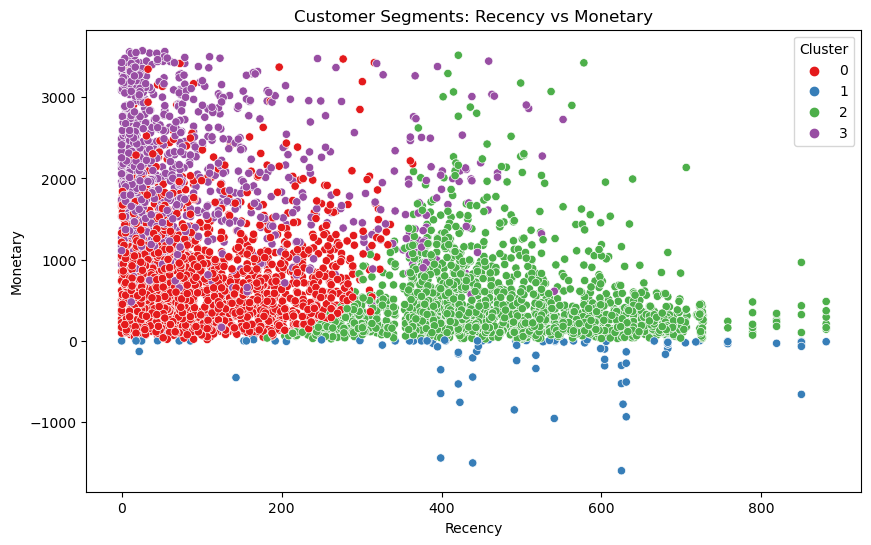

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_clean, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments: Recency vs Monetary')
plt.show()

**Visual Interpretation of Scatterplots(Recency vs Monetary Plot)**

Recency vs Monetary Scatterplot Interpretation

X-axis: Recency (how recently a customer made a purchase) — Lower values are better.

Y-axis: Monetary (total spending by the customer) — Higher values are better.

Color: Represents different clusters (0 = Red, 1 = Blue, 2 = Green, 3 = Purple).


**Cluster 3 (Purple) — Best / Loyal Customers**

Low Recency (~94): They’ve purchased recently.

High Monetary (~2034): They are big spenders.

Position in Plot: Located in the top-left quadrant,These customers have low recency (purchased recently) and high monetary values (big spenders). 

Insight: These are your most valuable customers. Focus on retention, loyalty programs, and personalized marketing.

**Cluster 0 (Red) — Moderately Active Customers**

Moderate Recency (~96): Recently active.

Moderate Monetary (~754): Moderate spending habits.

Position in Plot: Found in the middle-left region, Customers with moderate recency (somewhat recent purchases) and moderate spending.

Insight: Potential for growth. Could be nurtured into loyal customers with targeted offers.


**Cluster 2 (Green) — At-Risk Customers**

High Recency (~472): Haven’t made recent purchases.

Low Monetary (~464): Modest spending history.

Position in Plot: Clustered towards the bottom-right quadrant,High recency (haven’t purchased recently) and low monetary values (lower spenders).

Insight: These customers are at risk of churning. Consider re-engagement strategies.

**Cluster 1 (Blue) — Churned / Problematic Customers**

Very High Recency (~504): Likely churned or inactive for a long time.

Negative Monetary (~-173): Indicating returns or refunds.

Position in Plot: Bottom-right corner with some points dipping into negative monetary values,Very high recency (haven’t purchased in a long time) with negative spending, indicating returns or refunds.

Insight: Investigate return issues. Consider win-back campaigns to re-engage or understand dissatisfaction.

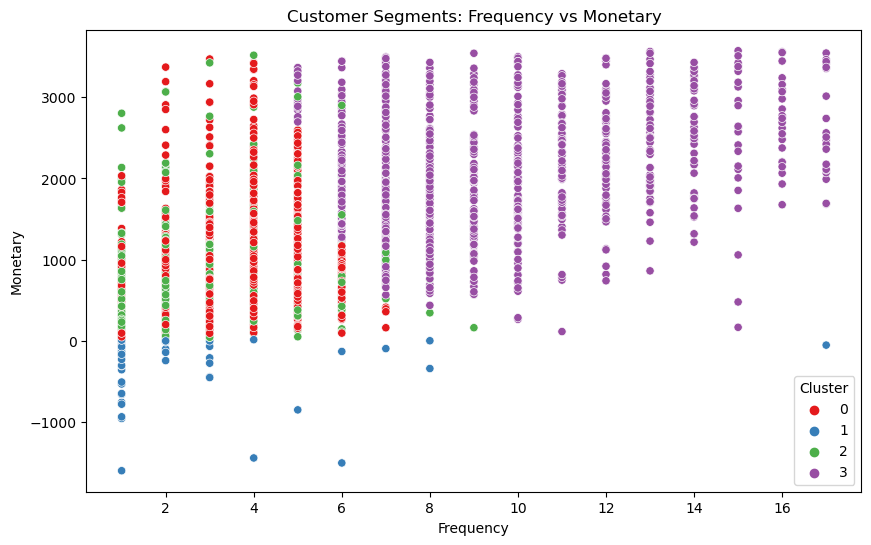

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_clean, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments: Frequency vs Monetary')
plt.show()

**Visual Interpretation of Scatterplots(Frequency vs Monetary Plot)**

X-axis: Frequency (number of purchases) — Higher values are better.

Y-axis: Monetary (total spending) — Higher values are better.

Color: Represents clusters (0 = Red, 1 = Blue, 2 = Green, 3 = Purple).

**Cluster 3 (Purple) — Best / Loyal Customers**

High Frequency (~9.37): They purchase often.

High Monetary (~2034): They spend a lot.

Position in Plot: Dominates the top-right quadrant,Customers with high frequency (frequent buyers) and high monetary values (big spenders).

Insight: VIP Customers — Retain them with loyalty rewards and exclusive benefits.

**Cluster 0 (Red) — Moderately Active Customers**

Moderate Frequency (~2.91): Occasional buyers.

Moderate Monetary (~754): Mid-level spending.

Position in Plot: Located around the middle of the plot,Customers with moderate frequency and moderate spending.

Insight: Can be converted into loyal customers through upselling or personalized recommendations.

**Cluster 2 (Green) — At-Risk Customers**

Low Frequency (~1.96): Rare buyers.

Low Monetary (~464): Modest spenders.

Position in Plot: Towards the bottom-left region,Customers with low frequency and low monetary values.

Insight: At-risk segment. Send targeted promotions to encourage repeat purchases.

**Cluster 1 (Blue) — Churned / Problematic Customers**

Very Low Frequency (~1.95): Almost inactive.

Negative Monetary (~-173): Signifies dissatisfaction or returns.

Position in Plot: Bottom-left corner, with some data points showing negative monetary values,Customers who’ve purchased very infrequently and may have requested refunds.

Insight: Churned customers. Conduct surveys to identify reasons for churn and offer win-back incentives.

In [46]:
from tabulate import tabulate

# Assign data with adjusted spacing for alignment
mydata = [
    ["0 (Red)", "Moderate", "Low", "Moderate", "Moderately Active Customers / Potential Loyalists", 
     "Engagement campaigns to boost frequency"],
    ["1 (Blue)", "High", "Very Low", "Negative", "Churned / Problematic / Inactive", 
     "Win-back strategies & investigate returns"],
    ["2 (Green)", "High", "Low", "Low", "Lost / At-Risk Customers", 
     "Reactivation campaigns"],
    ["3 (Purple)", "Low", "High", "High", "Best / Loyal Customers", 
     "Retention and VIP programs"]
]

# Create header
head = ["Cluster", "Recency (↓)", "Frequency (↑)", "Monetary (↑)", "Segment", "Key Strategy"]

# Display table with better alignment
print(tabulate(mydata, headers=head, tablefmt="fancy_grid", maxcolwidths=[None, None, None, None, 30, 20]))


╒════════════╤═══════════════╤═════════════════╤════════════════╤═══════════════════════════════╤══════════════════════╕
│ Cluster    │ Recency (↓)   │ Frequency (↑)   │ Monetary (↑)   │ Segment                       │ Key Strategy         │
╞════════════╪═══════════════╪═════════════════╪════════════════╪═══════════════════════════════╪══════════════════════╡
│ 0 (Red)    │ Moderate      │ Low             │ Moderate       │ Moderately Active Customers / │ Engagement campaigns │
│            │               │                 │                │ Potential Loyalists           │ to boost frequency   │
├────────────┼───────────────┼─────────────────┼────────────────┼───────────────────────────────┼──────────────────────┤
│ 1 (Blue)   │ High          │ Very Low        │ Negative       │ Churned / Problematic /       │ Win-back strategies  │
│            │               │                 │                │ Inactive                      │ & investigate        │
│            │               │  

**Key Insights:**
    
**Cluster 0 (Red) — Churn Risk / Inactive**

Moderate recency & low frequency indicate customers are not completely disengaged since their recency is moderate.
This behavior aligns well with customers who have potential to become loyalists if nurtured properly.

Strategy: Send engagement campaigns with personalized offers to boost interest and frequency.
    
**Cluster 1 (Blue) — Churned / Problematic Customers**

High recency (haven’t purchased in a long time) with negative monetary values (returns).

Strategy: Apply win-back strategies and investigate return reasons for potential improvements.

**Cluster 2 (Green) — At-Risk Customers**

High recency & low frequency/monetary suggest declining interest.

Strategy: Use reactivation campaigns with discounts to bring them back.
    
**Cluster 3 (Purple) — Best / Loyal Customers**

Low recency, high frequency, and high monetary value mark these as your VIPs.

Strategy: Focus on retention programs, exclusive rewards, and loyalty benefits.


In [42]:
rfm_clean

,customerID,Recency,Frequency,Monetary,Cluster
0,12346,326,17,-51.74,1
2,12348,76,5,2019.40,0
4,12350,311,1,334.40,2
5,12351,376,1,300.93,2
6,12352,73,13,1889.21,3
...,...,...,...,...,...
5914,18281,4,2,201.14,0
5915,18282,93,3,176.60,0
5917,18284,548,2,436.68,2
5918,18285,661,1,427.00,2


# Preparing the Data for Tableau




**We need to export the final dataset that includes:**

CustomerID

Recency, Frequency, Monetary

Cluster Labels (0, 1, 2, 3)

Segment Names (for better readability in Tableau)

**Export the Data from Python**



In [48]:
# Mapping cluster labels to meaningful segments
cluster_labels = {
    0: 'Moderately Active / Potential Loyalists',
    1: 'Churned / Problematic / Inactive',
    2: 'Lost / At-Risk Customers',
    3: 'Best / Loyal Customers'
}

# Adding the Segment column
rfm_clean['Segment'] = rfm_clean['Cluster'].map(cluster_labels)

# Exporting to CSV
rfm_clean.to_csv('rfm_customer_segments.csv', index=False)


In [49]:
rfm_clean

,customerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346,326,17,-51.74,1,Churned / Problematic / Inactive
2,12348,76,5,2019.40,0,Moderately Active / Potential Loyalists
4,12350,311,1,334.40,2,Lost / At-Risk Customers
5,12351,376,1,300.93,2,Lost / At-Risk Customers
6,12352,73,13,1889.21,3,Best / Loyal Customers
...,...,...,...,...,...,...
5914,18281,4,2,201.14,0,Moderately Active / Potential Loyalists
5915,18282,93,3,176.60,0,Moderately Active / Potential Loyalists
5917,18284,548,2,436.68,2,Lost / At-Risk Customers
5918,18285,661,1,427.00,2,Lost / At-Risk Customers
